In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from datetime import datetime

# Interpolation in 1-D: `pandas` `Series` \& `DataFrame`

**Dataset**: 2022 PMEL Saildrone mission, SD1033  
**Source**: https://www.pmel.noaa.gov/ocs/saildrone/data-access  
**Time coverage**: 2022-06-20 to 2022-09-27  

**Variables**:
- Wind speed (`wind_speed`), measured by a Gill Anemometer. Provided at **1 minute resolution**.
- Surface current speed (`current_speed`), calculated from eastward and westward current velocities and averaged over the three shallowest depth levels (6, 8, and 10 m). Velocities are measured by a Teledyne Workhorse ADCP and provided at **5 minute resolution**.

**Objective**: Interpolate current speeds to 1 minute resolution to match wind speed observations.

## Load the dataset

In [2]:
# Read in our dataset: 
saildrone_data = pd.read_csv('data/saildrone1033_1min.csv', parse_dates=True, index_col=0)

In [3]:
display(saildrone_data)

,wind_speed,current_speed,latitude,longitude
time,,,,
2022-06-20 00:00:00,NaN,NaN,NaN,NaN
2022-06-20 00:01:00,NaN,NaN,NaN,NaN
2022-06-20 00:02:00,NaN,NaN,NaN,NaN
2022-06-20 00:03:00,NaN,NaN,NaN,NaN
2022-06-20 00:04:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-09-27 23:55:00,NaN,NaN,NaN,NaN
2022-09-27 23:56:00,NaN,NaN,NaN,NaN
2022-09-27 23:57:00,NaN,NaN,NaN,NaN


## Plot the data

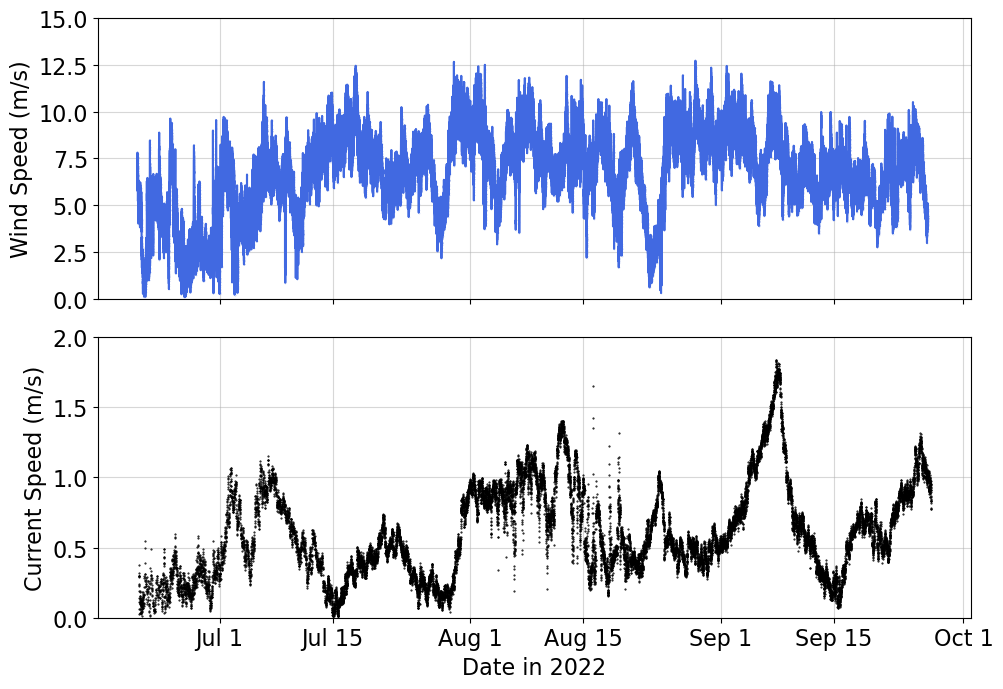

In [4]:
# Get a visual sense for our data
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 7))

# plot wind speed on top
axs[0].plot(saildrone_data.index, saildrone_data.wind_speed, 
            '.-', 
            markersize=0.1, 
            c='royalblue')

# plot current speed on bottom
axs[1].plot(saildrone_data.index, saildrone_data.current_speed, 
            '.-', 
            markersize=1, 
            c='k')

# figure formatting
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %-d'))
axs[1].xaxis.set_major_locator(mdates.DayLocator(bymonthday=[1, 15]))
axs[0].set_ylim([0, 15])
axs[1].set_ylim([0, 2])
axs[0].set_ylabel(f'Wind Speed (m/s)', fontsize=16)
axs[1].set_ylabel(f'Current Speed (m/s)', fontsize=16)
axs[1].set_xlabel('Date in 2022', fontsize=16)
for ax in axs: # formatting to apply to both subplot axes
    ax.grid(alpha=0.5)
    ax.tick_params(axis='both', labelsize=16)
plt.tight_layout()    

## Zoom in to one hour on 2022/09/01

,wind_speed,current_speed,latitude,longitude
time,,,,
2022-09-01 00:00:00,7.93,0.557174,3.724156,-123.600811
2022-09-01 00:01:00,8.79,NaN,NaN,NaN
2022-09-01 00:02:00,8.56,NaN,NaN,NaN
2022-09-01 00:03:00,8.74,NaN,NaN,NaN
2022-09-01 00:04:00,7.76,NaN,NaN,NaN
2022-09-01 00:05:00,8.56,0.565228,3.724224,-123.600895
2022-09-01 00:06:00,8.07,NaN,NaN,NaN
2022-09-01 00:07:00,8.55,NaN,NaN,NaN
2022-09-01 00:08:00,8.29,NaN,NaN,NaN


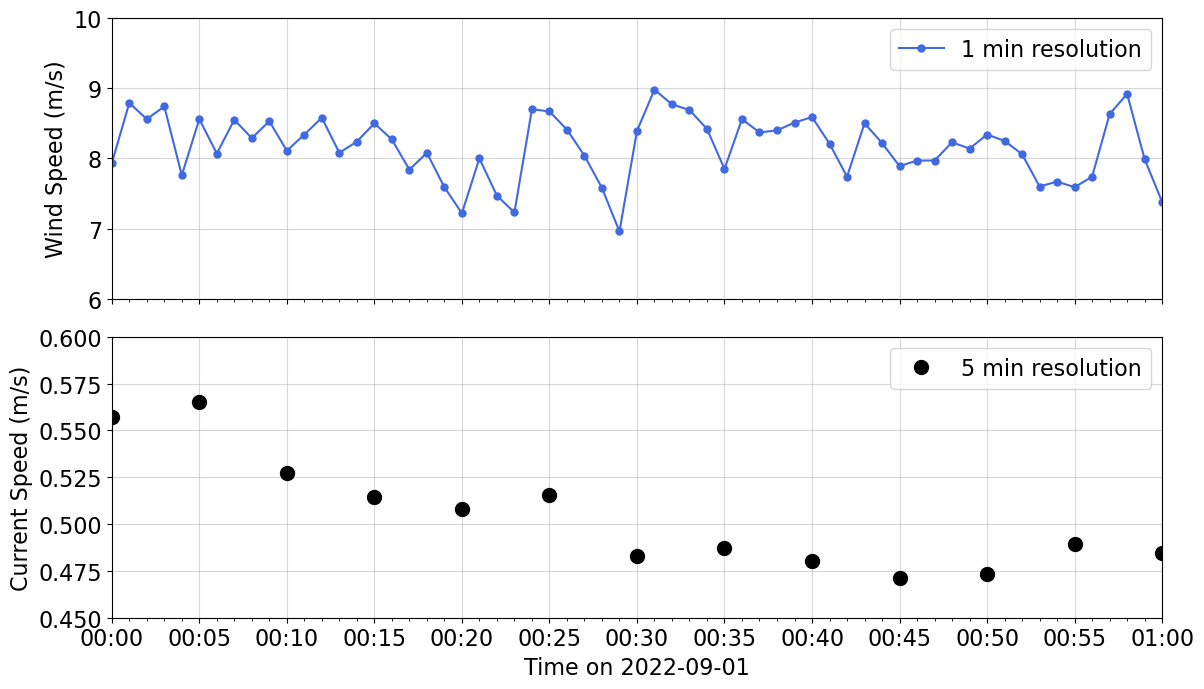

In [5]:
# Zoom in to one hour on 2022-09-01 to highlight the difference in resolution
start_time = datetime(2022, 9, 1, 0, 0, 0)
end_time = datetime(2022, 9, 1, 1, 0, 0)
saildrone_data_1hr = saildrone_data.loc[start_time:end_time]

# display the first 15 minutes
display(saildrone_data_1hr.head(15))

# make a zoomed in plot
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12, 7))

# plot wind speed on top
axs[0].plot(saildrone_data_1hr.index, saildrone_data_1hr.wind_speed, '.-', 
            markersize=10, c='royalblue', label='1 min resolution')

# plot current speed on bottom
axs[1].plot(saildrone_data_1hr.index, saildrone_data_1hr.current_speed, '.', 
            lw=1, markersize=20, c='k', label='5 min resolution')

# figure formatting
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[1].xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
axs[1].xaxis.set_minor_locator(mdates.MinuteLocator())
axs[0].set_ylim([6, 10])
axs[1].set_ylim([0.45, 0.6])
axs[0].set_xlim([start_time, end_time])
axs[1].set_xlabel('Time on 2022-09-01', fontsize=16)
axs[1].set_ylabel(f'Current Speed (m/s)', fontsize=16)
axs[0].set_ylabel(f'Wind Speed (m/s)', fontsize=16)
for ax in axs:
    ax.grid(alpha=0.5)
    ax.tick_params(axis='both', labelsize=16)
    ax.legend(fontsize=16)
plt.tight_layout()

## Experiment with different parameter settings for `.interpolate()` 

In [6]:
# define a plotting function for convenience
# (we'll talk about this next week!)
# this will allow us to use the same plotting code over and over without needing to retype it each time
def plot_saildrone(df_interp):
    # create the figure
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12, 7))

    # plot wind speed on top 
    axs[0].plot(saildrone_data_1hr.index, saildrone_data_1hr.wind_speed, '.-', markersize=10, c='royalblue', label='1 min resolution')

    # plot original current speed on bottom (5 minute resolution)
    axs[1].plot(saildrone_data_1hr.index, saildrone_data_1hr.current_speed, '.', lw=1, markersize=20, c='k', label='5 min resolution')

    # plot interpolated current speed on bottom plot as well
    axs[1].plot(df_interp.index, df_interp.current_speed, '.-', lw=2, markersize=14, c='orchid', label='Interpolated')

    # figure formatting
    axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # For the dates to just display hour and minute
    axs[1].xaxis.set_major_locator(mdates.MinuteLocator(interval=5)) # Label the x-axis every 5 minutes
    axs[1].xaxis.set_minor_locator(mdates.MinuteLocator())   # Draw minor tick marks every 1 minute
    axs[1].set_xlabel('Time (UTC) on 2022-09-01', fontsize=16)
    axs[1].set_ylabel(f'Current Speed (m/s)', fontsize=16)
    axs[0].set_ylabel(f'Wind Speed (m/s)', fontsize=16)
    axs[0].set_ylim([6.5,9.5])   # set the y limit for each axis
    axs[1].set_ylim([0.45, 0.6])
    axs[0].set_xlim([datetime(2022, 9, 1, 0, 0, 0), datetime(2022, 9, 1, 1, 0, 0)])
    for ax in axs:   # apply some figure formatting to both subplot axes
        ax.grid(alpha=0.5)
        ax.tick_params(axis='both', labelsize=16)  # increase the size of the axis tick labels
        ax.legend(fontsize=16)
    plt.tight_layout()
    plt.show()
    return

### Option 1: `limit=1`, `limit_direction='forward'`

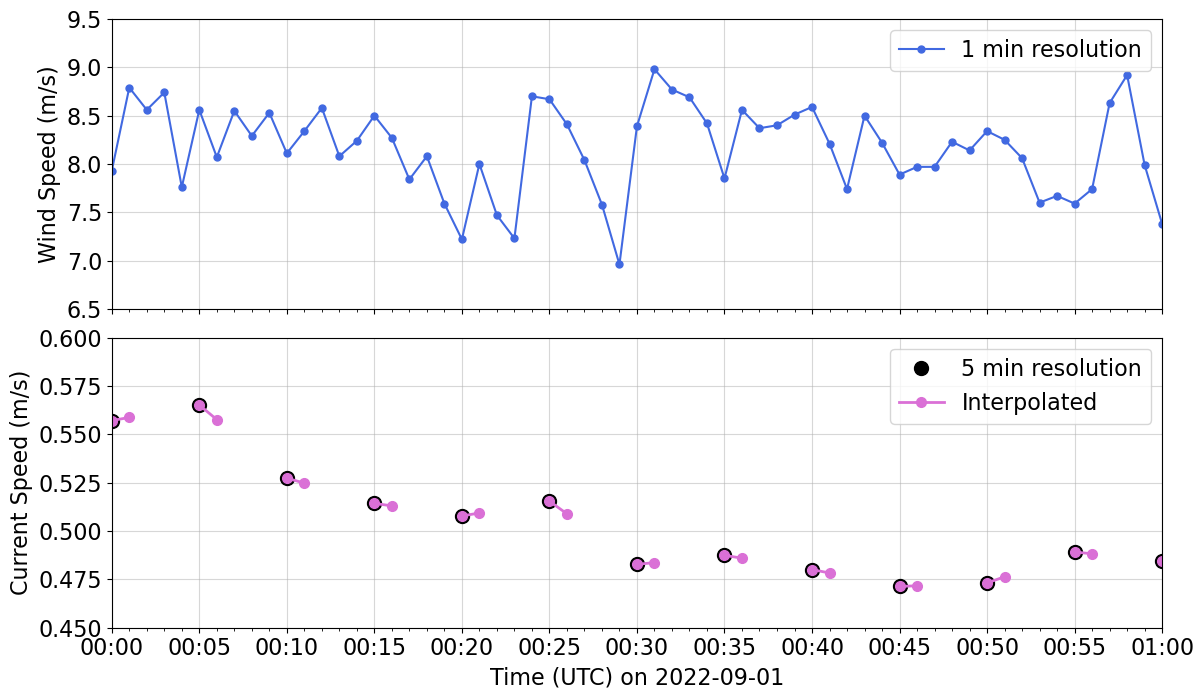

In [7]:
df = saildrone_data_1hr.interpolate(limit=1, limit_direction="forward")
plot_saildrone(df)

### Option 2: `limit=1`, `limit_direction='backward'` 

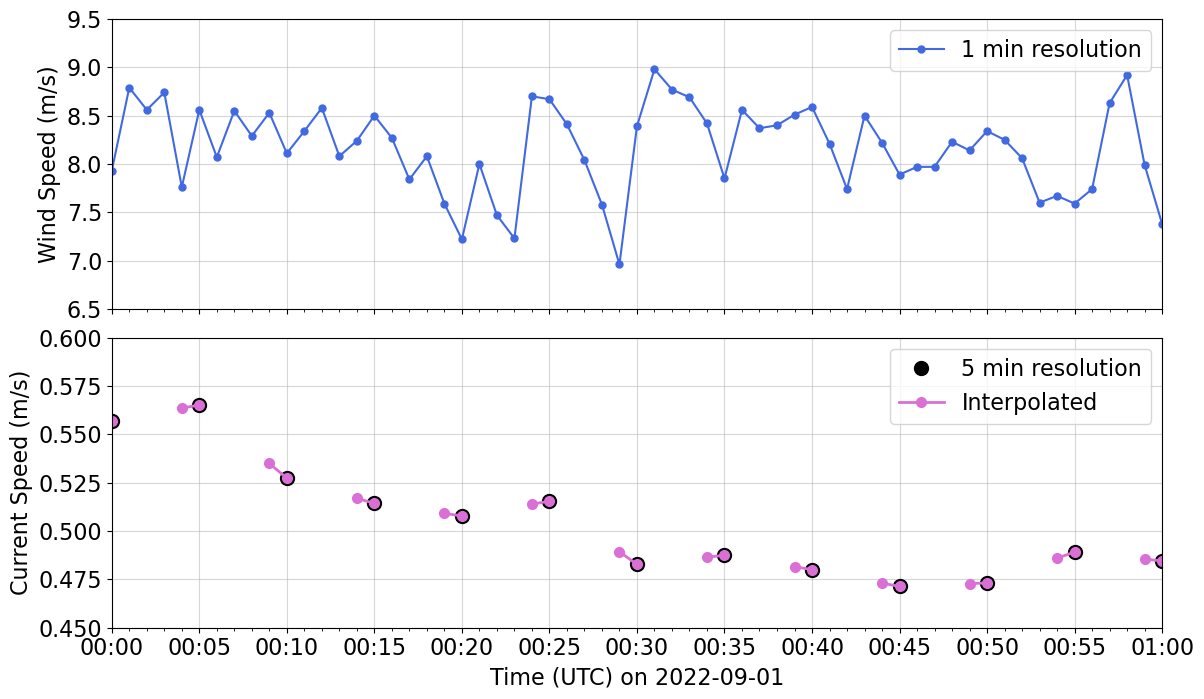

In [8]:
df = saildrone_data_1hr.interpolate(limit=1, limit_direction="backward")
plot_saildrone(df)

### Option 3: `limit=1`, `limit_direction='both'`

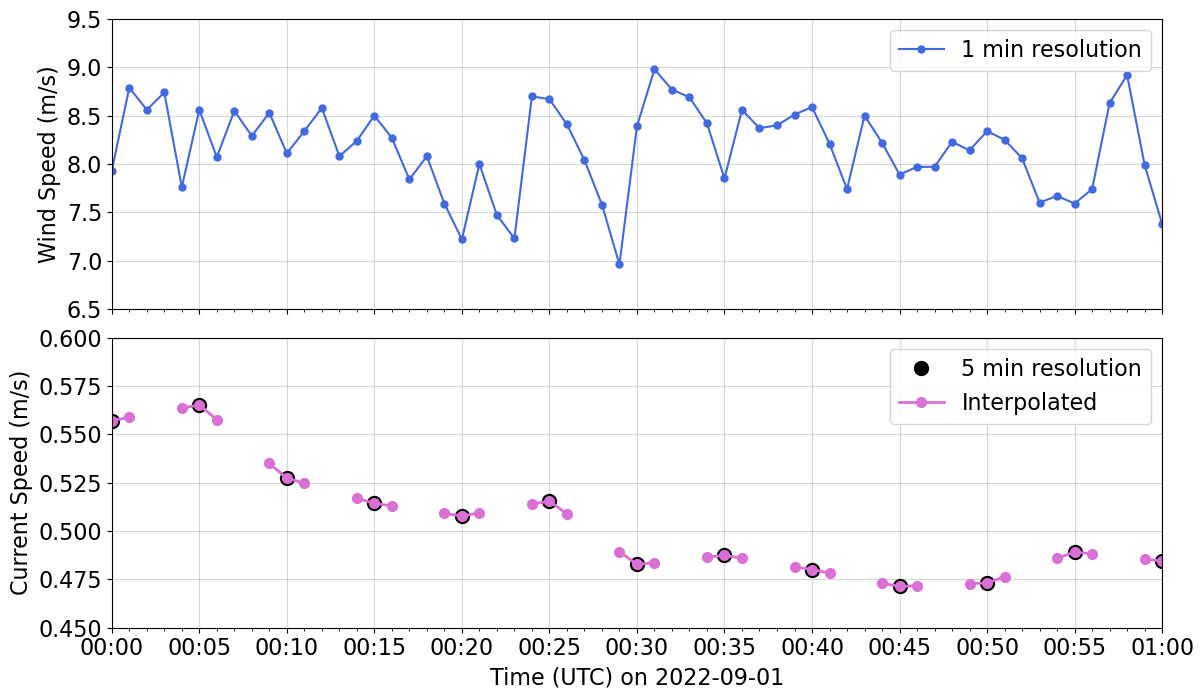

In [9]:
df = saildrone_data_1hr.interpolate(limit=1, limit_direction="both")
plot_saildrone(df)

### Option 4: `limit=2`, `limit_direction='forward'`

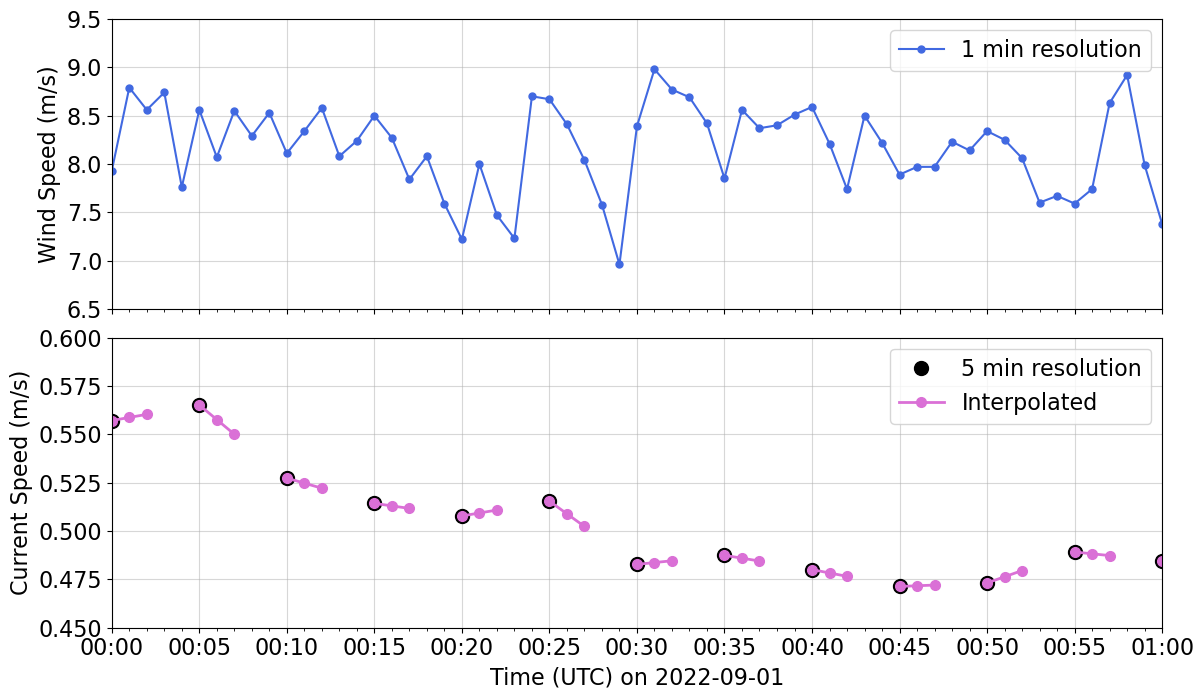

In [10]:
df = saildrone_data_1hr.interpolate(limit=2, limit_direction="forward")
plot_saildrone(df)

### Option 5: `limit=2`, `limit_direction='both'`

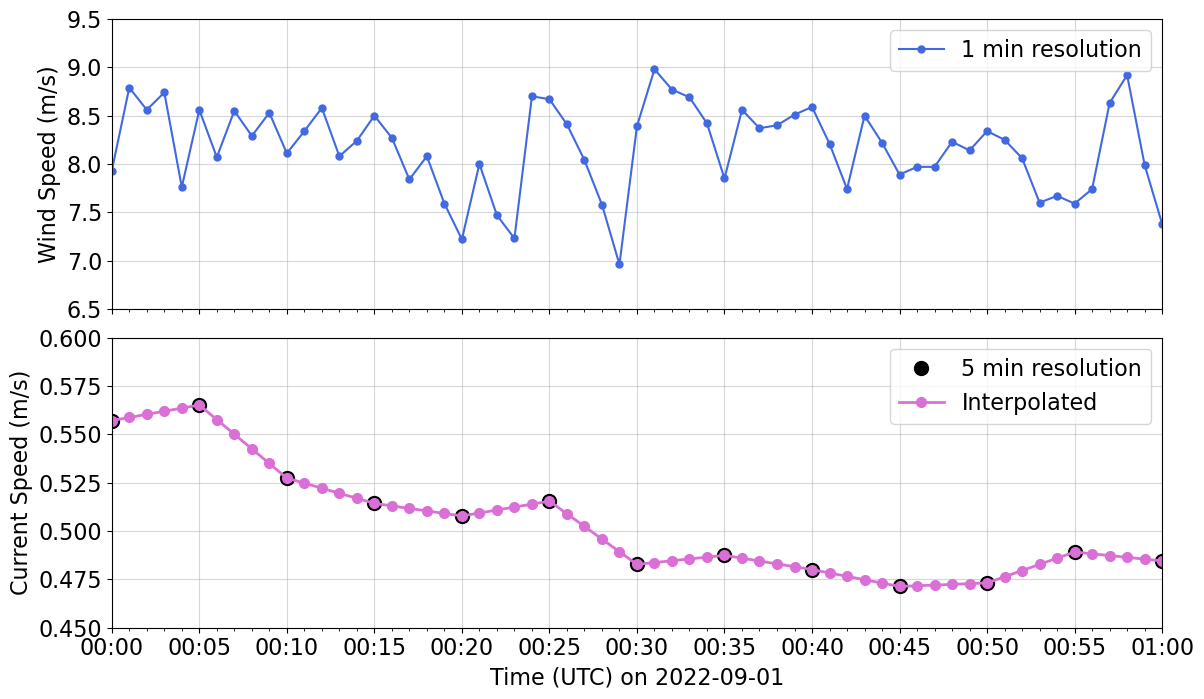

In [11]:
df = saildrone_data_1hr.interpolate(limit=2, limit_direction="both")
plot_saildrone(df)

### Option 6: `limit=2`, `limit_direction='both'`, `method='cubic'`

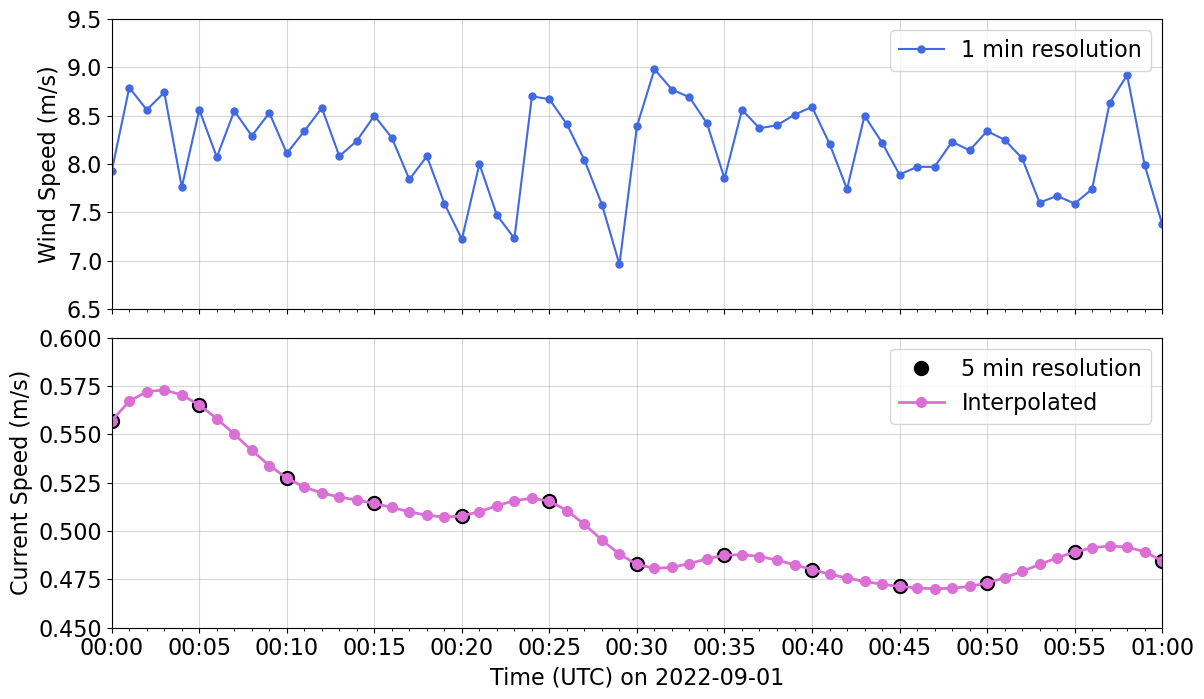

In [12]:
df = saildrone_data_1hr.interpolate(limit=2, limit_direction="both", method="cubic")
plot_saildrone(df)

## Code for making the maps from the video

/opt/conda/lib/python3.10/site-packages/shapely/creation.py:120: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, out=out, **kwargs)
/opt/conda/lib/python3.10/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)


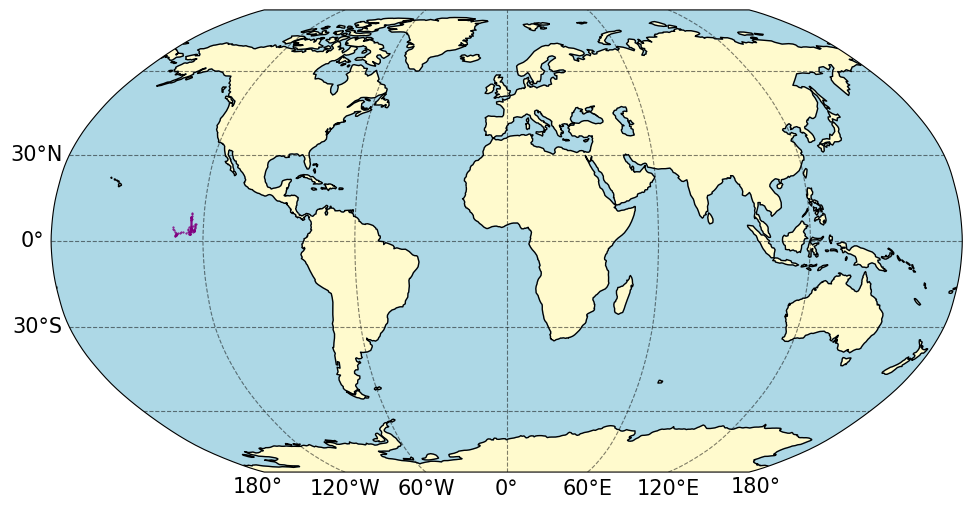

/opt/conda/lib/python3.10/site-packages/shapely/creation.py:120: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, out=out, **kwargs)
/opt/conda/lib/python3.10/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)


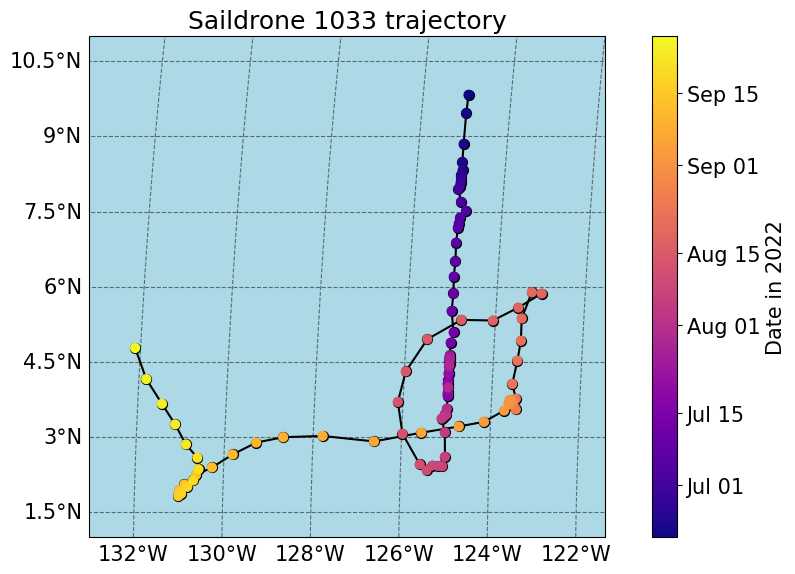

In [13]:
# Resample to daily resolution for a manageable map
saildrone_data_daily = saildrone_data.resample('1D').mean()
latitude = saildrone_data_daily.latitude
longitude = saildrone_data_daily.longitude
time = saildrone_data_daily.index

plt.rcParams['font.size'] = 15 # hack to increase all font sizes

# Plot the Saildrone's trajectory on a global map
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Robinson())
ax.add_feature(cfeature.LAND, color='lemonchiffon')  # add land coloring
ax.add_feature(cfeature.OCEAN, color="lightblue")    # add ocean coloring
ax.coastlines(resolution='110m', color='black')      # add coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='black', linestyle='--', alpha=0.5)
gl.bottom_labels=True
gl.left_labels=True
ax.set_extent([-180, 180, -90, 90]) # force map to show full globe
ax.plot(longitude, latitude, '.', color='purple', transform=ccrs.PlateCarree(), markersize=1)
plt.tight_layout()
plt.show()

# Zoom in on the Saildrone's trajectory
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Robinson())
ax.add_feature(cfeature.LAND, color='lemonchiffon')  # add land coloring
ax.add_feature(cfeature.OCEAN, color="lightblue")    # add ocean coloring
ax.coastlines(resolution='110m', color='black')      # add coastlines
ax.set_title("Saildrone 1033 trajectory")
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='black', linestyle='--', alpha=0.5)
gl.bottom_labels=True
gl.left_labels=True
ax.set_extent([-133, -122, 1, 11]) # bounding box: [x1, x2, y1, y1]
ax.scatter(longitude, latitude, c="black", transform=ccrs.PlateCarree(), s=50, zorder=2)
ax.plot(longitude, latitude, '-', c="black", transform=ccrs.PlateCarree(), zorder=1)
time_plot = ax.scatter(longitude, latitude, c=mdates.date2num(time), 
                       cmap='plasma', transform=ccrs.PlateCarree(), s=40, zorder=3)
cbar = fig.colorbar(time_plot,   # colorbar formatting
                  ticks=mdates.DayLocator(bymonthday=[1,15]), # label the 1st and 15th of each month 
                  format=mdates.DateFormatter('%b %d'))
cbar.set_label("Date in 2022")
plt.tight_layout()
plt.show()

Data provided by the Moored Carbon and the Engineering Project Office of NOAA/PMEL.

**Data citation:**
Sabine, C., A.J. Sutton, K. McCabe, N. Lawrence-Slavas, S.R. Alin, R.A. Feely, R. Jenkins, S. Maenner, C. Meinig, J. Thomas, E. van Ooijen, A. Passmore, and B. Tilbrook (2020): Evaluation of a new carbon dioxide system for autonomous surface vehicles. J. Atmos. Oceanic Tech., 37(8), 1305–1317, doi: 10.1175/JTECH-D-20-0010.1